# ___Bike Sharing Assignment___

## _Problem Statement_:

#### _A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state._

#### ___Essentially the company wants :___

#### _*     To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model._
#### _*     To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes._
#### _*     To know the accuracy of the model, i.e. How well those variables describe the bike demands_

#### _They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits._

## _Step 1 Importing Required Libraries_

### _Step 1.1 Importing Libraries for useful for Understanding the data and EDA etc._

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

### _Step 1.2 Importing Libraries for ignoring warnings_

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### _Step 1.3 Importing StatsModel Library for displaying detailed information_

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### _Step 1.3 Importing Scikit Library for evaluating requirement specific parameters and performing preprocessing steps_

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

## _Step 2. Data Sourcing_

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
# Read the data from csv file

bike_df = pd.read_csv('day.csv')

In [7]:
# Check the head of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# checking the shape of dataframe

bike_df.shape

(730, 16)

In [9]:
# describing the columns of dataframe

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# get the info about columns

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
# Check the shape of df

print(bike_df.shape)

(730, 16)


## _Inferences_ : 
### _Dataset has 730 rows and 16 columns._
### _We need to use the 'CNT' column for the prediction purposes.__

### _Except one column, all other are either float or integer type._ 

### _One column is date type._

### _Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type._


### _Step 2.2 Checking for null values and duplicates_

In [12]:
# checking for the null values in column data

bike_df.isnull().sum()



instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Checking for duplicate values

bike_dup = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

### _Step 2.3 Checking for any unwanted values_

In [14]:
for col in bike_dup:
    print(bike_dup[col].value_counts(ascending=False), '\n\n\n')

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 



01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.9894

## _Inferences:_

### _In the Bike Prediction dataset there are no null and duplicate values_
### _The dataset contains no unknown values that need to be removed_

## _Step 3. Preparing the data_

### _Step 3.1 Renaming a few columns for readability_

In [15]:
# renaming few columns for better readibility

bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [16]:
# checking the table for updated column names
bike_df.tail()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


### _Step 3.2 Removing unecessary columns_

### _Some columns are necessary and can be removed from the dataset . If we observe the dataset and the data dictionary the below columns seem to be irrelevant._

#### _1. instant has only index for the row_
#### _2. dteday has date which can be compensated by year and month column_
#### _3. Requirements mention "The model should be built taking this 'cnt' as the target variable." . Since casual and registered add to give cnt, these can be dropped._

In [17]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

### _Step 3.3 Encoding of numerical values for better understanding_ 

In [18]:
# Encoding the season column
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [19]:
# Encoding the month column

bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [20]:
# Encoding the weekday column

bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [21]:
# Encodingthe weathersit column

bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [22]:
# check some values of the dataset

bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## _Step 4: Visualising the data_

### _Step 4.1 Let us first start visualising the categorical values against cnt : Plotting box plots and bar graphs_

In [23]:
# function to create barplot related to categorical columns
def plot_cat_against_cnt_year(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x =column,y ='cnt',data=bike_df)
    plt.subplot(1,2,2)
    sns.barplot(x =column,y ='cnt',data=bike_df, hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

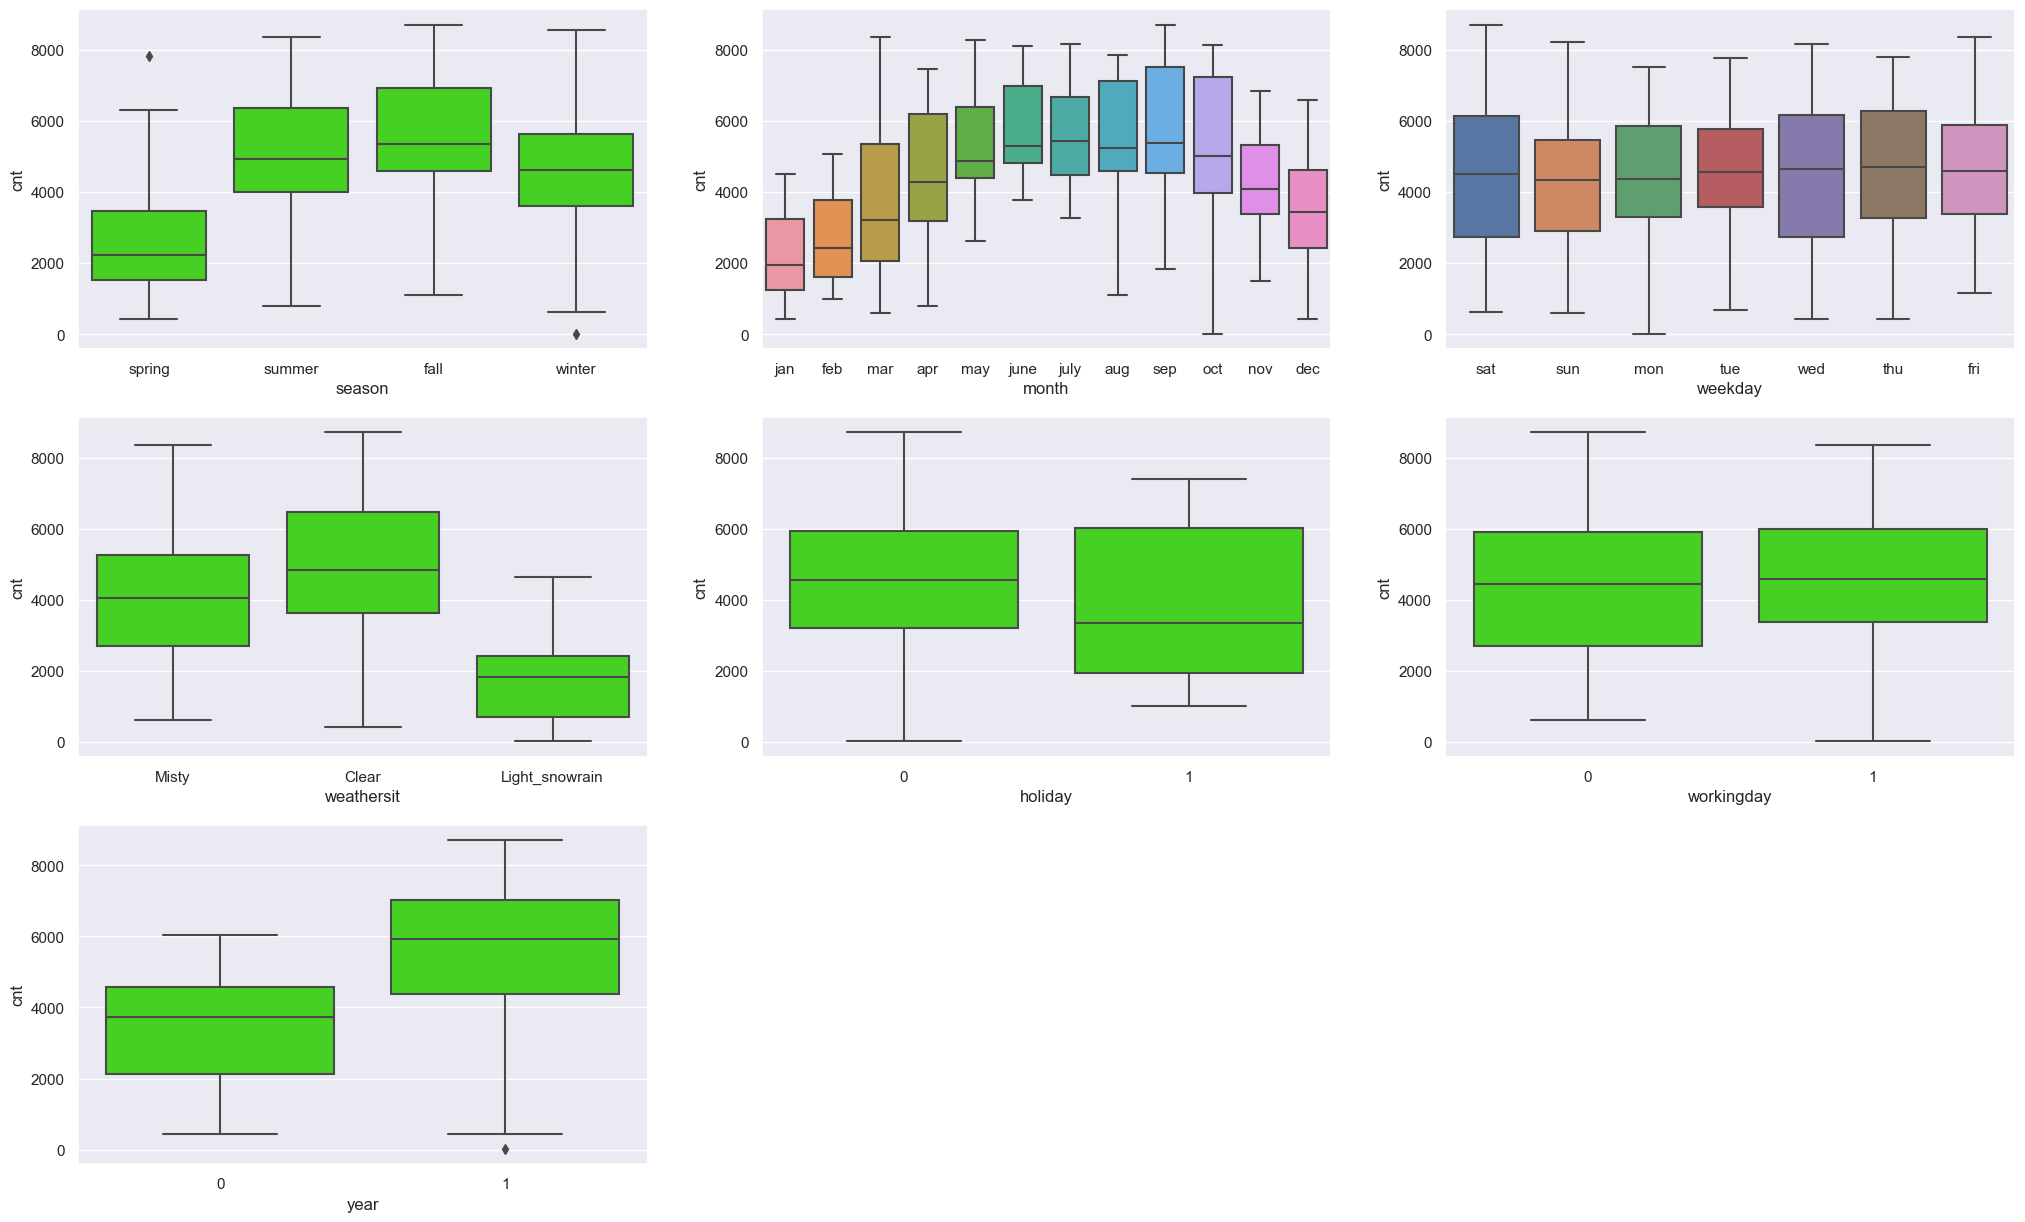

In [24]:
color_pallete = '#35ed07'
plt.figure(figsize=(25, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df ,color=color_pallete)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_df )
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df )
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df ,color=color_pallete)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df , color=color_pallete)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df , color=color_pallete)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_df , color=color_pallete)
plt.show()

#### _1. For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for spring._

#### _2. The year 2019 had a higher count of users as compared to the year 2018._


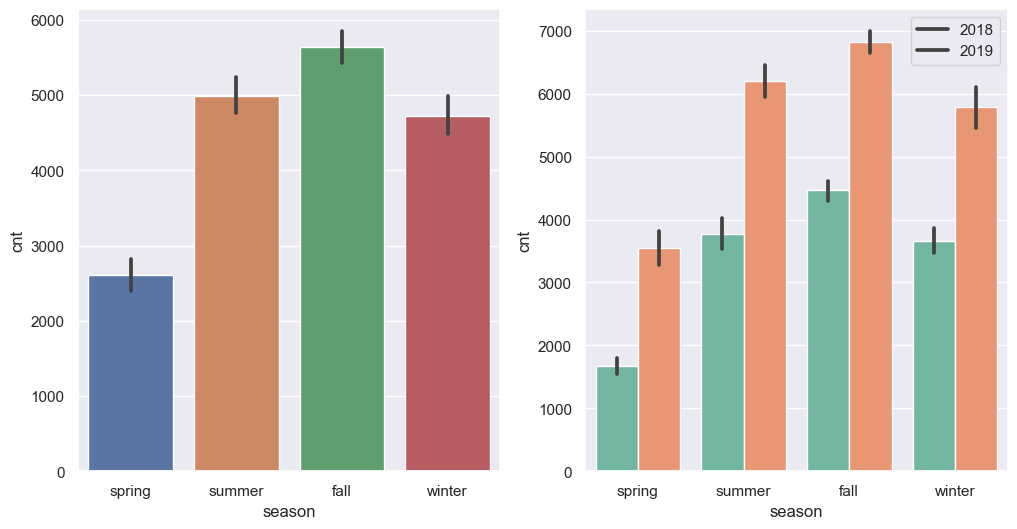

In [25]:
# plotting visualization for season column

plot_cat_against_cnt_year('season')

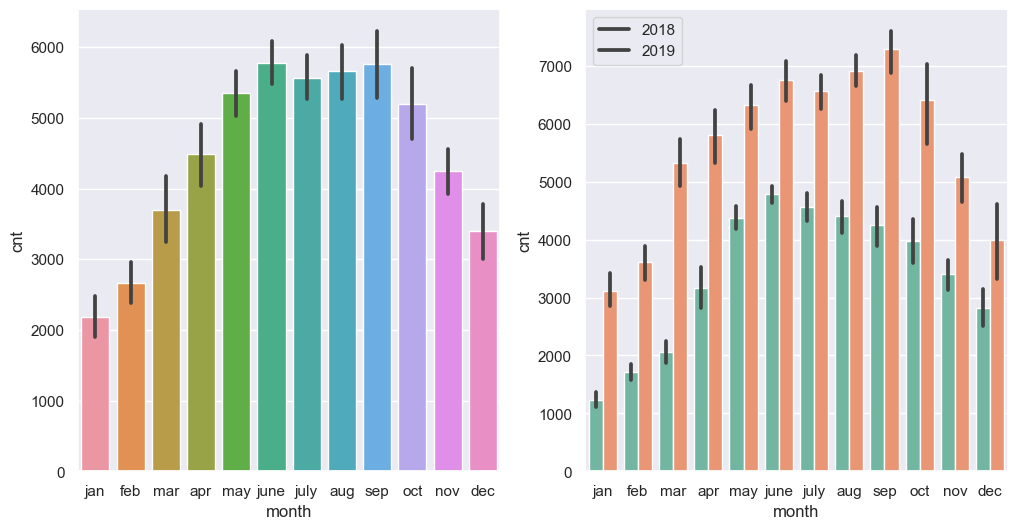

In [26]:
# plotting visualization for month column

plot_cat_against_cnt_year('month')

#### _Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019._

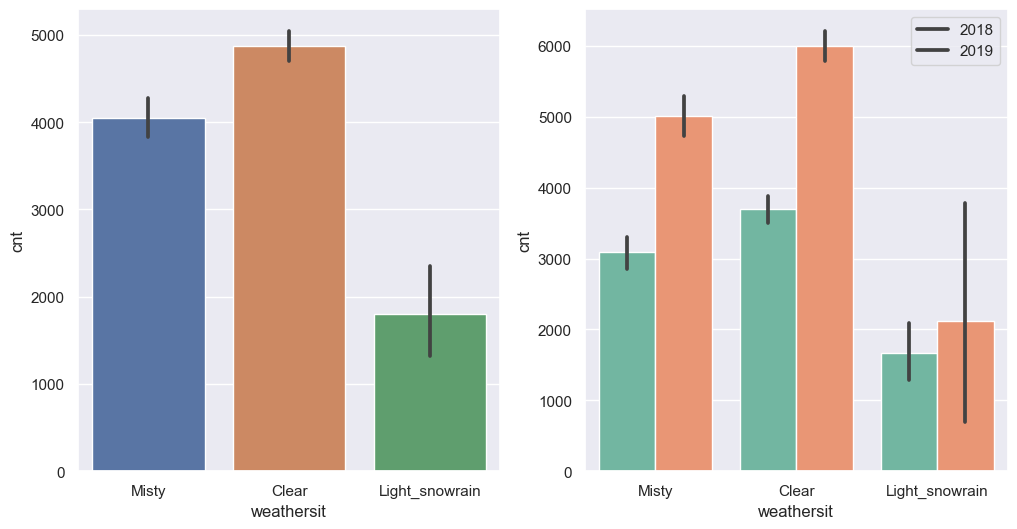

In [27]:
# plotting visualization for weathersit column

plot_cat_against_cnt_year('weathersit')

#### _Clear weather attracted more bookings which seems obvious.Bookings increased for each weather situation in 2019 as compared to 2018 ._

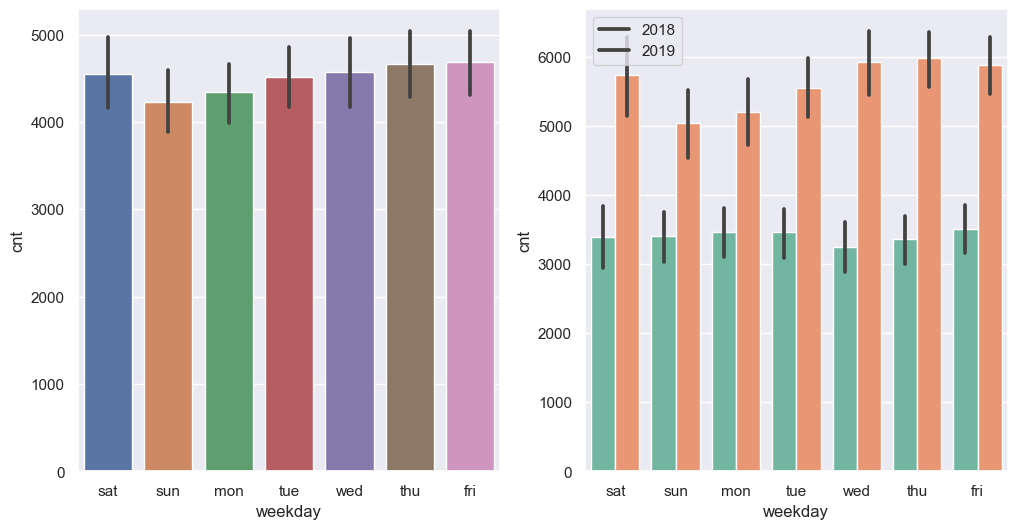

In [28]:
# plotting visualization for weekday column

plot_cat_against_cnt_year('weekday')

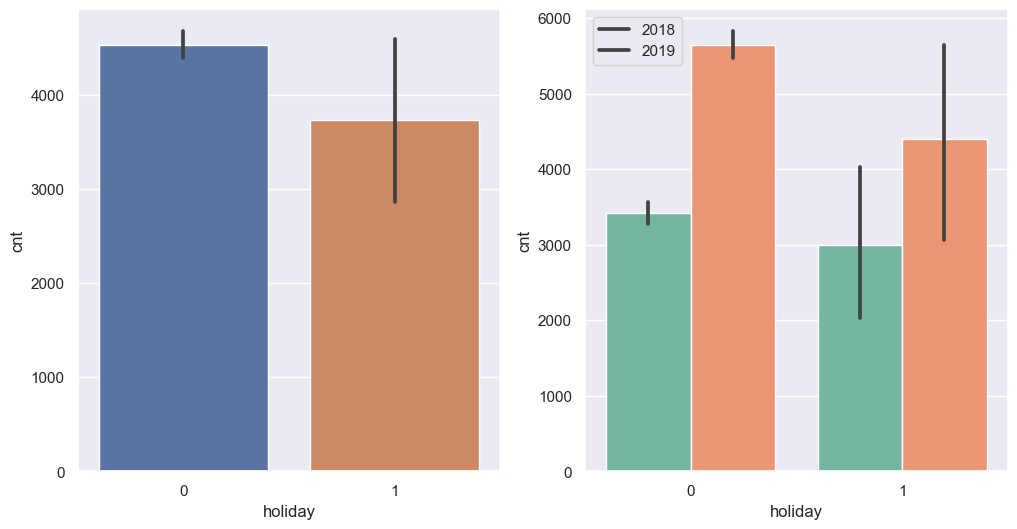

In [29]:
# plotting visualization for holiday column

plot_cat_against_cnt_year('holiday')

### _Ride Count is lesser on Holidays as compared to other days._

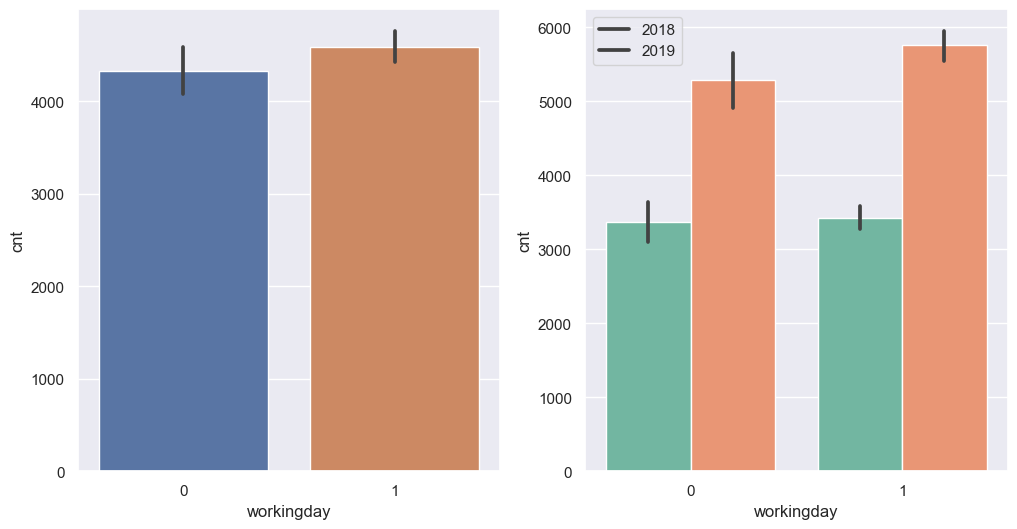

In [30]:
# plotting visualization for workingday column

plot_cat_against_cnt_year('workingday')


#### _It is clearly evident from the box plot and bar plot that bookings made on a weekday are almost equal to weekend . There is a slight increase in workday . It is also observed that Sunday generally the booking is less._

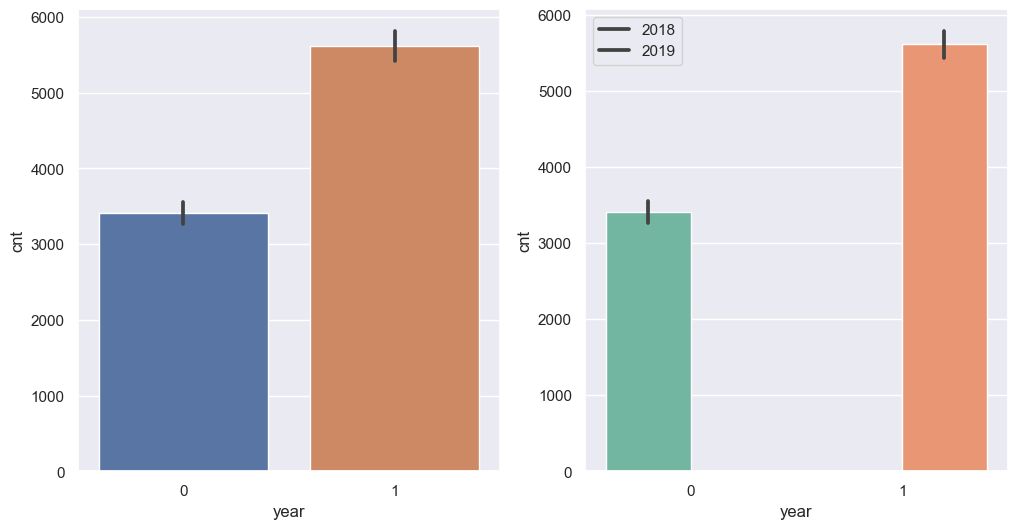

In [31]:
# plotting visualization for year column

plot_cat_against_cnt_year('year')

### _Step 4.2 Creating Heatmap correlation between numerical values_

In [32]:
# collecting all numerical values

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

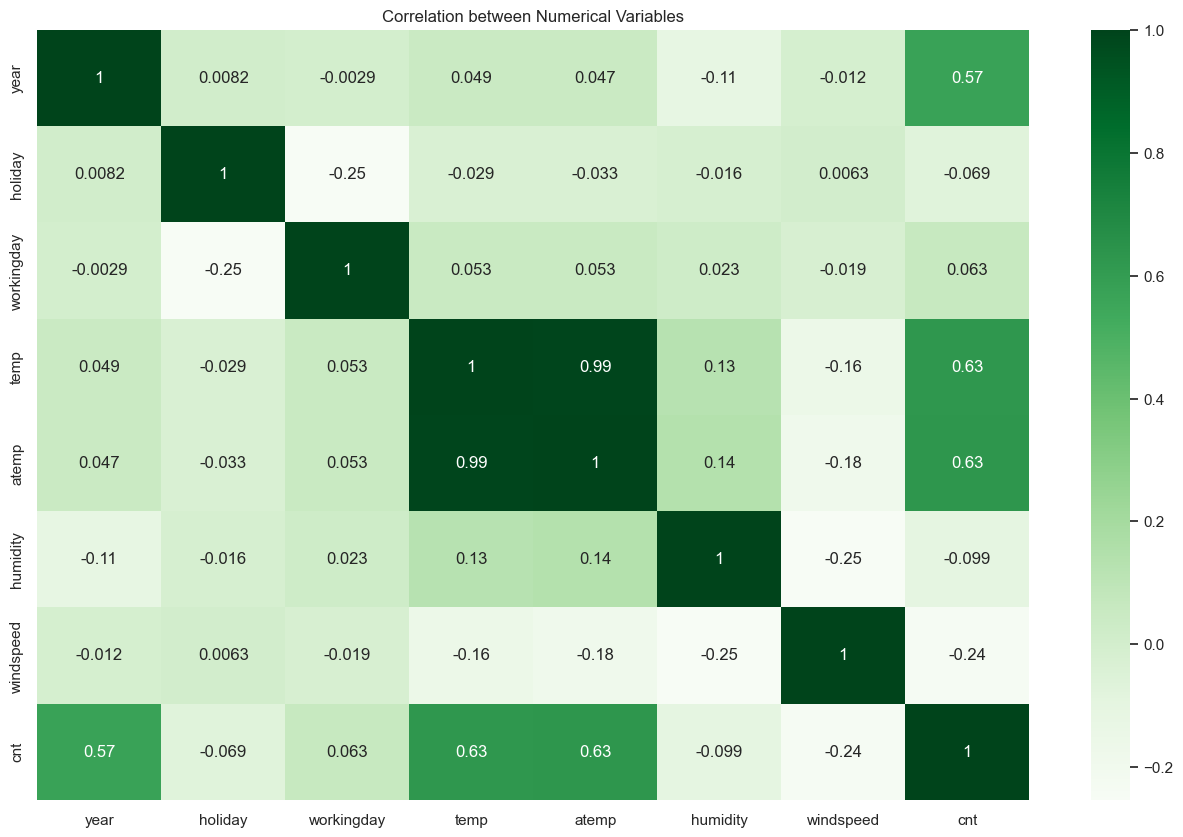

In [33]:
# Checking the correlation between the numerical variables

bike_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(bike_df.corr(), annot=True, cmap='Greens')
plt.title("Correlation between Numerical Variables")
plt.show()

### _Step 4.2.2 Creating pairplots against numerical values_

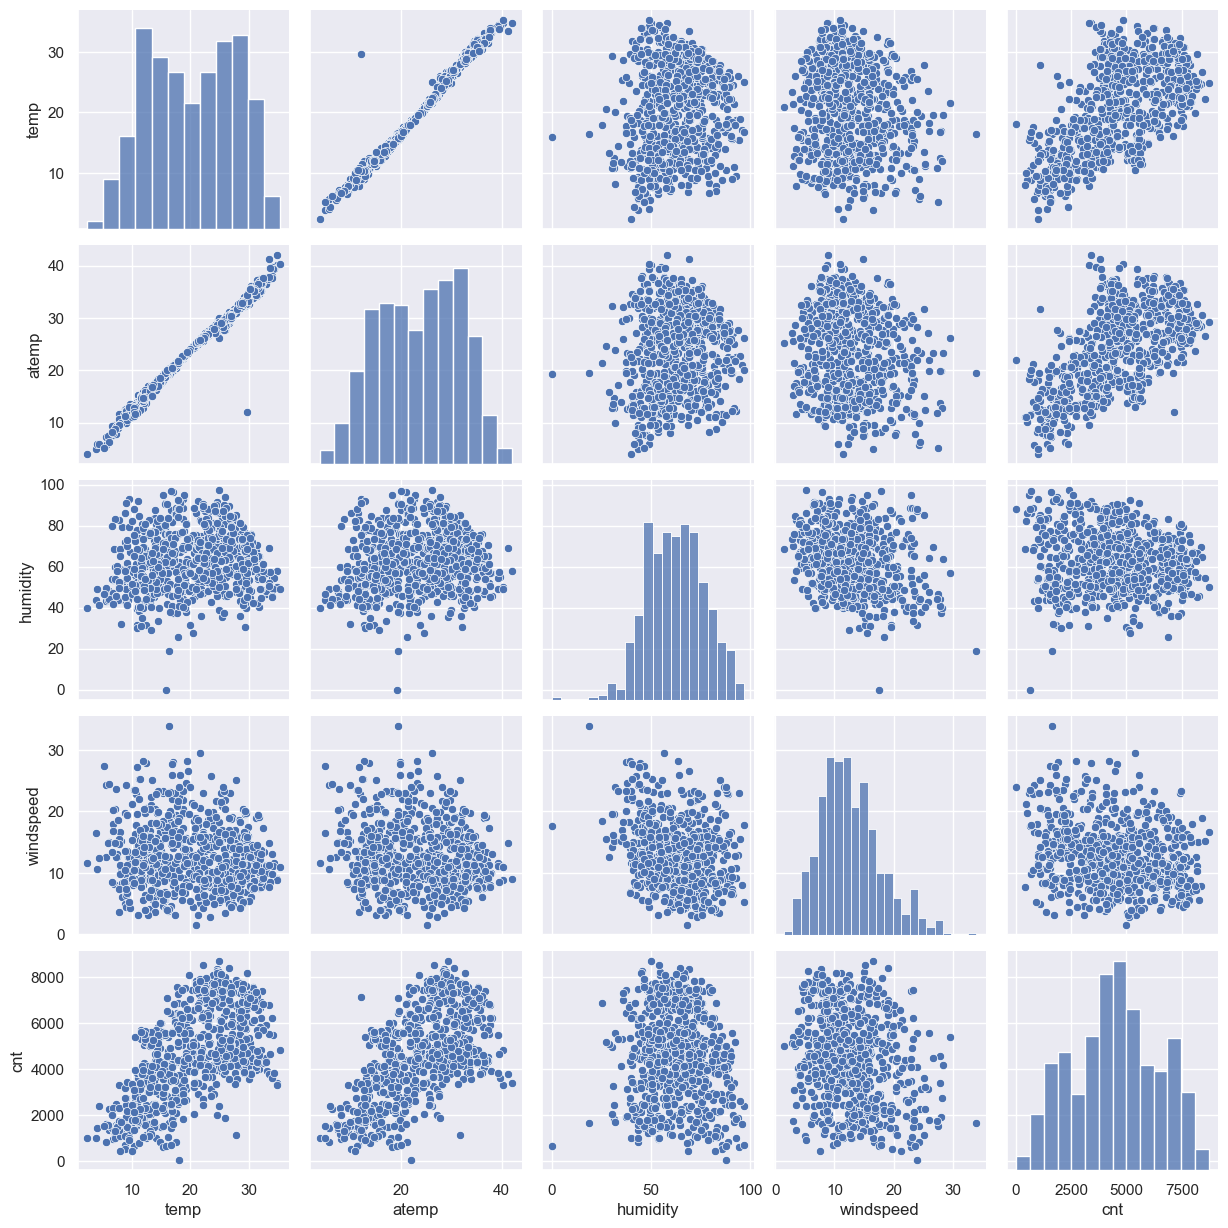

In [34]:

sns.pairplot(data=bike_df,vars=num_vars)
plt.show()

#### _The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'_ 

### _Step 4.2.3 Checking for any outliers in numerical data_

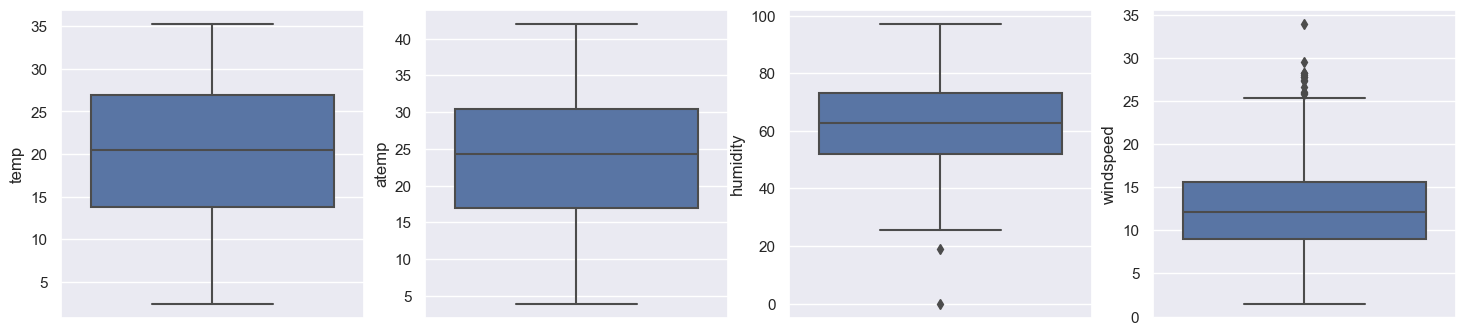

In [35]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

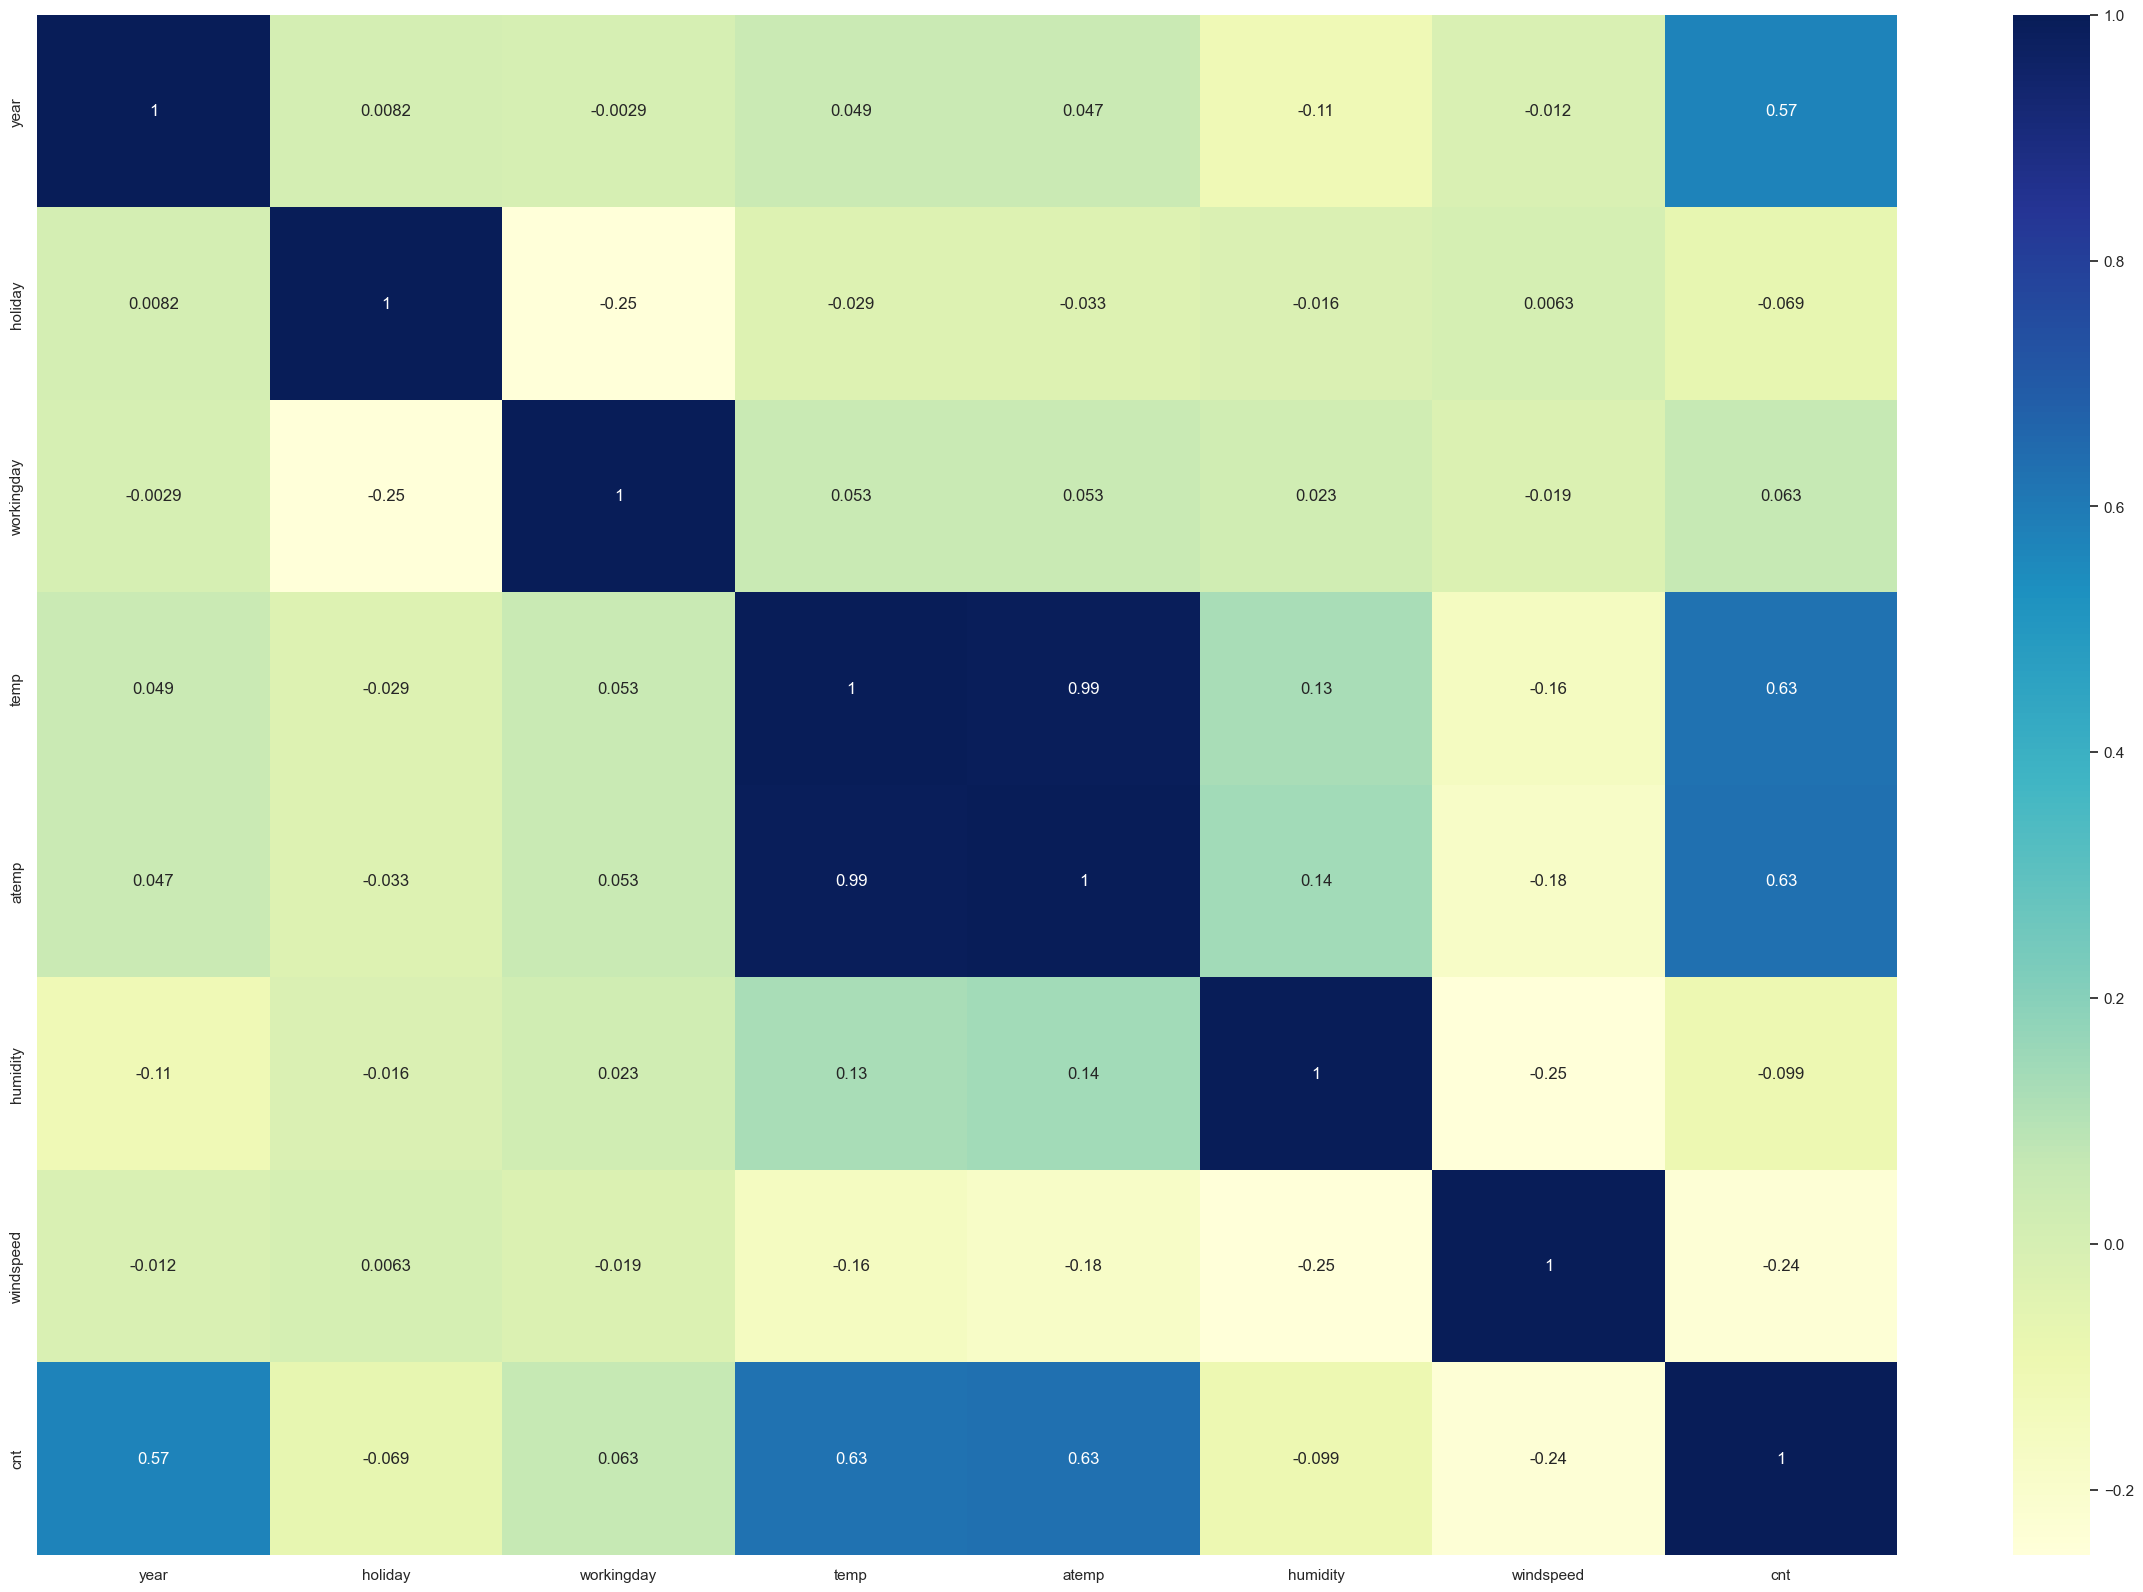

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### _cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation._

## _Insights from the visualisation above_

#### _1. Season affects the bike bookings . Maximum bookings happened during the fall. It was followed by summer and winter. Therefore season can be a good predictor of bike booking count._

#### _2. We can observe how the bookings vary over the month .May,June,July,August,Sept,Oct have medians alomost at 5000 for year 2018. Therefore these months would contribute to maximum bookings. Month can be used as a predictor for bike bookings._

#### _3. weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.Clear weathers are indicative of higher number of bike bookings. As these numbers seem rationally higher for a kind of weather , we can use them to predict_

#### _4. The median count of users is almost throughout the week. We can use this information to adjust the model accordingly._

#### _5. Rentals reduced during holiday_

#### _6. We can refer to correlation heat map and pairplots to choose the numerical predictors._

## _Step 5. Data preparation (contd.)_

### _Step 5.1 creating dummy variables_

#### _Creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'._

In [37]:
# Check the datatypes before convertion
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [38]:
# Convert to 'category' data type

bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['month']=bike_df['month'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')


In [39]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [40]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_df = pd.get_dummies(bike_df, drop_first=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  month_aug                  730 non-null    uint8  
 12  month_dec                  730 non-null    uint8  
 13  month_feb                  730 non-null    uint8  

In [41]:
bike_df.shape

(730, 30)

### _5.2 Split the data_


#### _Split the data into TRAIN and TEST (70:30 ratio)_

In [42]:
# Check the shape before spliting

bike_df.shape

(730, 30)

In [43]:
# Check the info before spliting

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  month_aug                  730 non-null    uint8  
 12  month_dec                  730 non-null    uint8  
 13  month_feb                  730 non-null    uint8  

In [44]:

# splitting the dataframe into Train and Test
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.70, random_state = 100)


- Verify the info and shape of the dataframes after split:

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       510 non-null    int64  
 1   holiday                    510 non-null    int64  
 2   workingday                 510 non-null    int64  
 3   temp                       510 non-null    float64
 4   atemp                      510 non-null    float64
 5   humidity                   510 non-null    float64
 6   windspeed                  510 non-null    float64
 7   cnt                        510 non-null    int64  
 8   season_spring              510 non-null    uint8  
 9   season_summer              510 non-null    uint8  
 10  season_winter              510 non-null    uint8  
 11  month_aug                  510 non-null    uint8  
 12  month_dec                  510 non-null    uint8  
 13  month_feb                  510 non-null    uint8

In [46]:
df_train.shape

(510, 30)

In [47]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       220 non-null    int64  
 1   holiday                    220 non-null    int64  
 2   workingday                 220 non-null    int64  
 3   temp                       220 non-null    float64
 4   atemp                      220 non-null    float64
 5   humidity                   220 non-null    float64
 6   windspeed                  220 non-null    float64
 7   cnt                        220 non-null    int64  
 8   season_spring              220 non-null    uint8  
 9   season_summer              220 non-null    uint8  
 10  season_winter              220 non-null    uint8  
 11  month_aug                  220 non-null    uint8  
 12  month_dec                  220 non-null    uint8  
 13  month_feb                  220 non-null    uint8

In [49]:
df_test.shape

(220, 30)

## Correlation Matrix

## _6. Scaling the features_

In [50]:
scaler = MinMaxScaler()

In [51]:
# Checking the values before scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [53]:

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
# Checking values after scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### _6.2 Check the correlation coefficients_

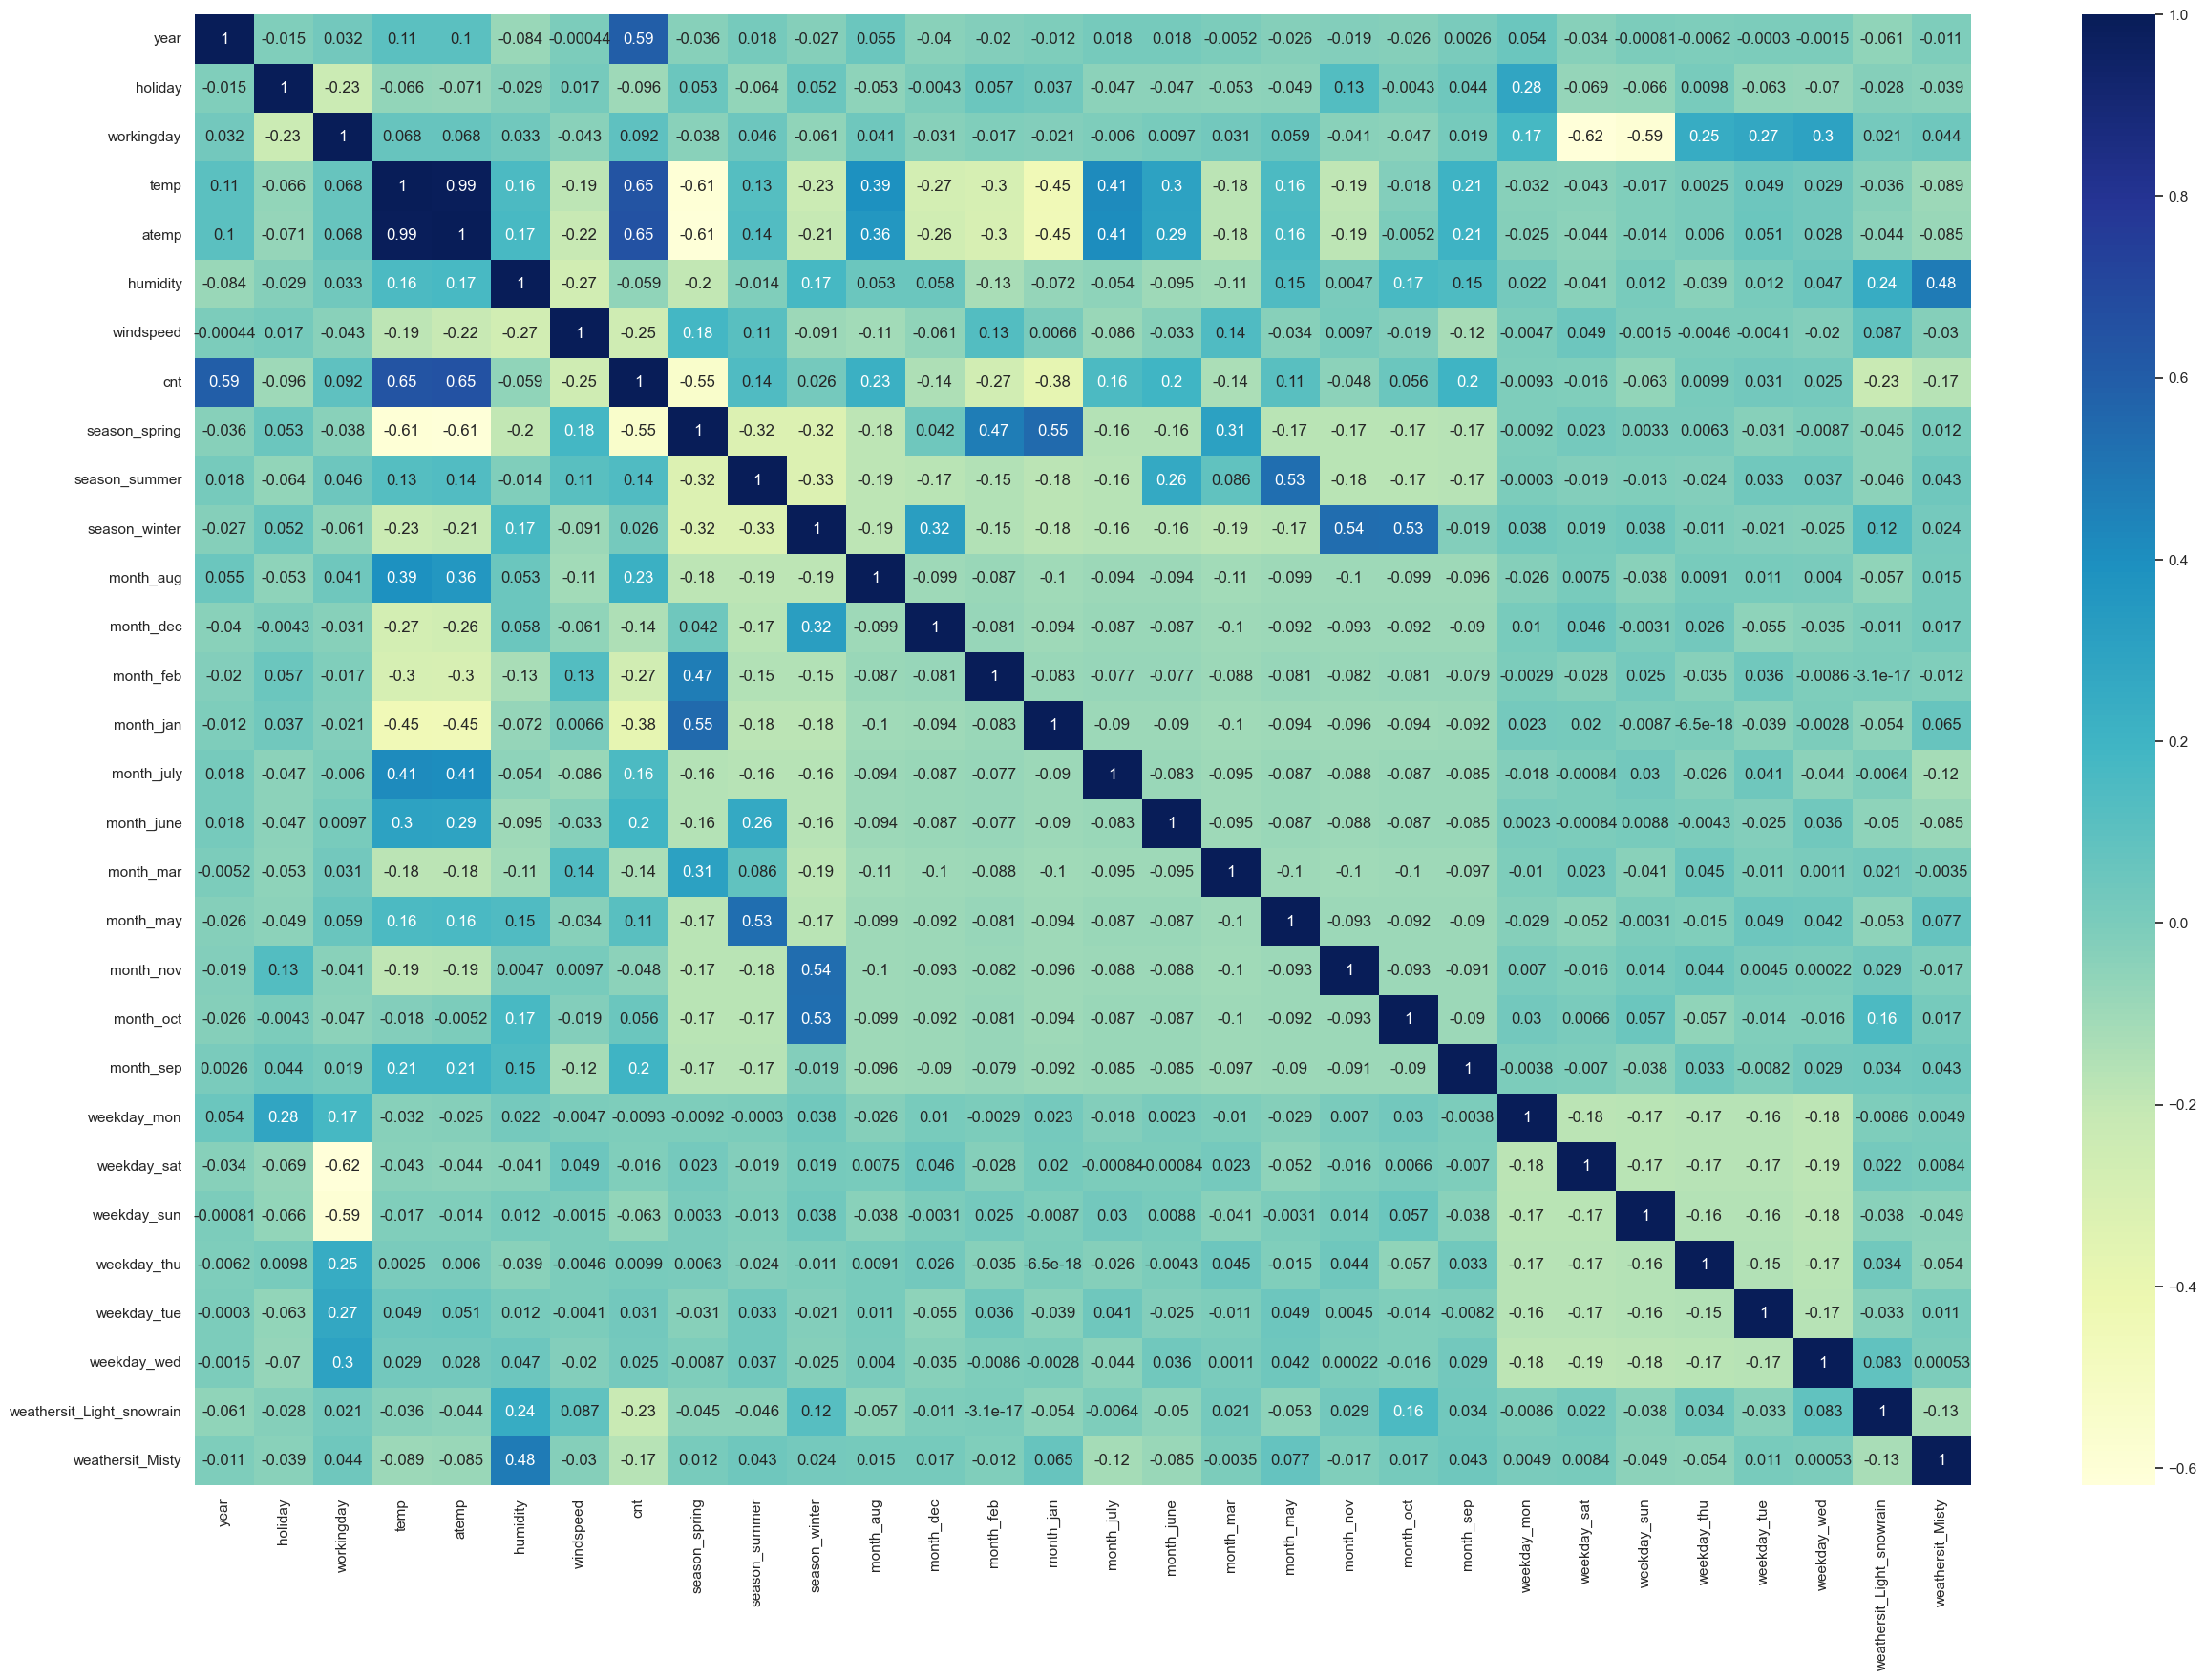

In [56]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## _7. Building the model - I_

#### _The most fundamental approach is to revist the correlation matrix and pick a variable that shows significant correlation . Also the variables we found useful as a consequence of the EDA we performed , can be used to prepare the model . Variables can be included as we build the model ground up. But in above case ,there are a lot variables. This may not be the most efficient way to build a model. We build a model using variables selected using recursive feature elimination._

#### _Dividing into X and Y sets for the model building_

In [57]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

### _7.1 RFE_
#### _Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)_

In [58]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)


In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 2),
 ('month_dec', True, 1),
 ('month_feb', False, 2),
 ('month_jan', True, 1),
 ('month_july', False, 2),
 ('month_june', False, 2),
 ('month_mar', False, 2),
 ('month_may', False, 2),
 ('month_nov', False, 2),
 ('month_oct', False, 2),
 ('month_sep', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [60]:

# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_dec',
       'month_jan', 'month_sep', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [61]:
X_train.columns[~rfe.support_]

Index(['workingday', 'month_aug', 'month_feb', 'month_july', 'month_june',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### _7.2 Creation of Linear Model using 'STATS MODEL'_

### _Model 1_

#### _7.2.1 Checking VIF_

In [63]:
# defining a function
def find_vif_train_data(x_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = x_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [64]:
find_vif_train_data(X_train_rfe)

,Features,VIF
2,temp,376.20
3,atemp,366.79
4,humidity,30.37
5,windspeed,4.89
6,season_spring,4.32
8,season_winter,3.41
7,season_summer,2.59
13,weathersit_Misty,2.31
0,year,2.09
10,month_jan,1.73


In [65]:

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [66]:
# Check the parameters obtained

lr1.params

const                        0.292263
year                         0.231019
holiday                     -0.096293
temp                         0.495679
atemp                       -0.013047
humidity                    -0.155236
windspeed                   -0.189516
season_spring               -0.040856
season_summer                0.063796
season_winter                0.105402
month_dec                   -0.022202
month_jan                   -0.041390
month_sep                    0.095417
weathersit_Light_snowrain   -0.245719
weathersit_Misty            -0.053116
dtype: float64

In [67]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.12e-187
Time:                        21:28:45   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### _7.2.2 improving upon model 1 to create Model 2_

#### _Removing the variable 'humidity' based on its High VIF._
#### _It is a conscious decision not to drop temp since bike ride booking has dependency on temp. The correlation between temp and cnt is higher as per the eda we have carried out._

In [68]:
X_train_new = X_train_rfe.drop(["humidity"], axis = 1)

#### _VIF Check_

In [69]:
find_vif_train_data(X_train_new)

,Features,VIF
2,temp,368.46
3,atemp,366.30
4,windspeed,4.86
5,season_spring,2.87
0,year,2.07
7,season_winter,2.05
6,season_summer,2.03
9,month_jan,1.64
12,weathersit_Misty,1.56
8,month_dec,1.29


In [70]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [71]:
# Check the parameters obtained

lr2.params

const                        0.221196
year                         0.234805
holiday                     -0.097369
temp                         0.479865
atemp                       -0.037601
windspeed                   -0.161489
season_spring               -0.050924
season_summer                0.055821
season_winter                0.090229
month_dec                   -0.028838
month_jan                   -0.047464
month_sep                    0.087881
weathersit_Light_snowrain   -0.289112
weathersit_Misty            -0.077911
dtype: float64

In [72]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          9.34e-185
Time:                        21:28:45   Log-Likelihood:                 499.02
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     496   BIC:                            -910.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### _It was observed that removing the year drops the F-statistic. Hence year has been kept as it is_

### _7.2.3 improving upon model 2 to create Model 3_

#### _1.Removing the variable 'working' based on the initally EDA performed on the data. We have observed that bikes rides are booked evenly on a weekday/ weekend. Hence dropping it from the model since it may not hold much relevance._
#### _2. It is a conscious decision not to drop temp since bike ride booking has dependency on temp. The correlation between temp and cnt is higher as per the eda we have carried out._

In [73]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

KeyError: "['workingday'] not found in axis"

In [ ]:
find_vif_train_data(X_train_new)

In [ ]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [ ]:
lr3.params

In [ ]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

### _7.2.3 improving upon model 3 to create Model 4_

#### _1. We have observed from the analysis performed on days of a week that days of a week do not affect the bike ride bookings much. Hence weekday_sat can be dropped . It also holds some p value._
#### _2. It is a conscious decision not to drop temp since bike ride booking has dependency on temp. The correlation between temp and cnt is higher as per the eda we have carried out._


In [ ]:
X_train_new = X_train_new.drop(["weekday_sat"], axis = 1)

#### _VIF for model 4_

In [ ]:
find_vif_train_data(X_train_new)

In [ ]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [ ]:
# Check the parameters obtained

lr4.params

In [ ]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

### _7.2.4 improving upon model 4 to create Model 5_

#### _1. month_jan has some p-value. Also the seasons which seem to be also better predictors of ride bookings cover the winter months. Hence we can drop the month_jan to observe the findings._


In [ ]:
# year has both high vif and p-value
X_train_new = X_train_new.drop(["month_jan"], axis = 1)

#### _VIF for model 5_

In [ ]:
find_vif_train_data(X_train_new)

In [ ]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [ ]:
# Check the parameters obtained

lr5.params

In [ ]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

### _Inferences_
### _1. From the Model Summary Report we can say that all the p-values of respective features are well under control_
### _2. This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)._

## _8. Final Model Interpretation_

### _8.1 Hypothesis Testing:_

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### _Inferences_
#### _From the lr5 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**_
    

### _8.2 F Statistics_

### _F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is._

- F-statistic: 229.6
- Prob (F-statistic):  5.06e-187

### _The F-Statistics value of 229.6 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant_

### _8.3 The equation of best fitted surface based on model lr5_:

cnt = 0.199434 + (**year** × 0.233570) - (**holiday** × 0.097463) + (**temp** × 0.490988) − (**windspeed** × 0.147919) - (**season_spring** × 0.067169) + (**season_summer** ×0.046487) + (**season_winter** × 0.081741) - (**month_july** ×0.052057) + (**month_sep** × 0.076846) - (**weathersit_Light_snowrain** × 0.284199) -(**weathersit_Misty** × 0.080167)

### _Interpretation of Coefficients:_
#### _**temp:** A coefficient value of ‘0.490988’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.490988 units._

#### _**year:** A coefficient value of ‘0.233570’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.233570 units._

#### _**holiday:** A coefficient value of ‘-0.097463’ indicated that, w.r.t holiday, a unit increase in holiday variable, decreases the bike hire numbers by -0.097463 units._

#### _**season_spring:** A coefficient value of ‘-0.067169’ indicated that w.r.t season_spring:, a unit increase in season_spring: variable increases the bike hire numbers by -0.067169 units._

#### _**windspeed:** A coefficient value of ‘-0.147919’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by -0.147919 units._

#### _**season_summer:** A coefficient value of ‘0.0464487’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.0464487 units._

#### _**season_winter:** A coefficient value of ‘0.081741’ indicated that w.r.t season_winter, a unit increase in season_winter variable decreases the bike hire numbers by 0.081741 units._

#### _**month_july:** A coefficient value of ‘0.052057’ indicated that w.r.t month_july, a unit increase in month_july variable decreases the bike hire numbers by 0.052057 units._

#### _**month_sep:** A coefficient value of ‘0.076846’ indicated that w.r.t month_sep, a unit increase in month_sep variable increases the bike hire numbers by 0.076846 units._

#### _**weathersit_Light_snowrain:** A coefficient value of ‘0.284199’ indicated that w.r.t weathersit_Light_snowrain, a unit increase in weathersit_Light_snowrain variable decreases the bike hire numbers by 0.284199 units._

#### _**weathersit_Misty:** A coefficient value of ‘0.080167’ indicated that w.r.t weathersit_Misty, a unit decreases in weathersit_Misty variable decreases the bike hire numbers by 0.080167 units._

### _8.4 Residual Analysis Of Training Data_

#### _We must verify the assumptions made for linear regression after a model is prepared._

In [ ]:
y_train_pred = lr5.predict(X_train_lm5)

In [ ]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
find_vif_train_data(X_train_new)

## _Inferences_
### _1. From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid._
### _2. There is a linear relationship between X and Y_
### _3. There is No Multicollinearity between the predictor variables_

## _Inferences_
### _1. From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of almost/below 5._

 

## _9.FINAL MODEL - PREDICTIONS USING TEST DATA_

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### _9.1 Applying the scaling on the test sets_

In [ ]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
df_test.head()

In [ ]:
df_test.describe()

### _9.2 Dividing into X_test and y_test_

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

In [ ]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

In [ ]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

## _10. Model Evaluation_

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [ ]:
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

 ## _11. R^2 Value for TEST_

In [ ]:
#calculating adjusted r2 value
r2_score(y_test, y_pred)

In [ ]:
# We already have the value of R^2 (calculated in above step)

r2=0.805268034904855

In [ ]:
# Get the shape of X_test
X_test.shape


In [ ]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

## _12. Final Result Comparison_

#### _- Train R^2 :0.835_
#### _- Train Adjusted R^2 : 0.832_ 
#### _- Test R^2 :0.805268034904855_
#### _- Test Adjusted R^2 :0.7949697098277079_ 
### _- This seems to be a good model that can very well 'Generalize' various datasets._

## _13. FINAL REPORT_

### _As per our final Model, the top predictor variables that influences the bike booking are:_

#### _1. With an increase in temperature the demand also increases, hence it should keep track of the weather conditions._
#### _2. In weathers of light snowrain, the demand can decrease significantly._
#### _3. Users dont prefer to book ride sharing during high windspeed, the demand can decrease significantly on windy days._
#### _4. 2019 year showed higher bookings , significantly higher. This indicates that as rides booking get popular with time, bookings may tend to increase_